In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

In [2]:
def choose_action(Q, S, epsilon):
    n_actions = 3
    if np.random.rand() < epsilon:
        action = np.random.randint(n_actions)             # Random action
    else:
        action = np.argmax(Q[S[0], S[1]])
    return action

In [3]:
def q_lambda(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4), lamb = 0.1):
    # Size of discretized state space
    n_states = 20  
    n_actions = env.action_space.n  

    # Initialize Q table
    Q = np.random.uniform(low = 0, high = 1, size = (n_states, n_states, n_actions))
    # Initialize eligibility traces:
    e = np.zeros((n_states,n_states, n_actions))

    policy = np.random.randint(n_actions, size=(n_states, n_states))             # Random policy

    interval = (env.observation_space.high - env.observation_space.low) / n_states
    high = env.observation_space.high
    low  = env.observation_space.low

    total_episode_length = []
    reward_list = []
    avg_reward_list = []
    successes = 0

    for ep in tqdm(range(num_ep)):      
        S = env.reset()
        S = [int(s) for s in np.floor((S - low) / interval)]

        done = False
        t = 0
        
        action = choose_action(Q, S, epsilon)
        
        while not done or t<=200:
            S_, R, done, _ = env.step(action)
            S_ = [int(s) for s in np.floor((S_ - low) / interval)]
            e = (gamma * lamb * e)
            e[S[0] , S[1], action] += 1 
            next_action = choose_action(Q, S_, epsilon)

            td_error = R + gamma * Q[S_[0],S_[1], next_action] - Q[S[0] , S[1], action]
            Q +=  (alpha * td_error * e)
            
            t += 1
            action = next_action
            if R>0:
                print("Reward:", R)
                successes += 0

        total_episode_length.append(t)
        
        avg_episode_length = np.mean(total_episode_length)

        if (ep+1) % num_ep == 0 :
            V = np.max(Q, axis = 2)
            print('Episode {} || Avg Timestep: {} || Lambda: {}'.format(ep+1, avg_episode_length, lamb))
            total_episode_length = []
            plt.imshow(V)
            plt.colorbar()
            plt.show()




    #avg_ep_length = (total_episode_length/num_ep) 
    #print("N =",n," ||  α = {:.2f}".format(alpha)," || Avg. Episode_length =",avg_ep_length)
    return successes, avg_episode_length

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


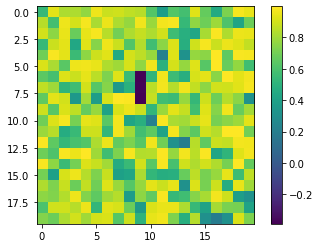

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


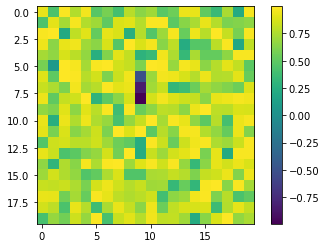

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


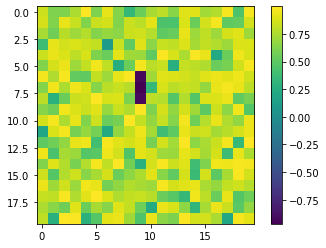

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


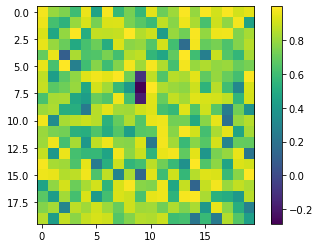

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


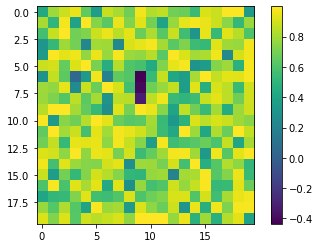

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


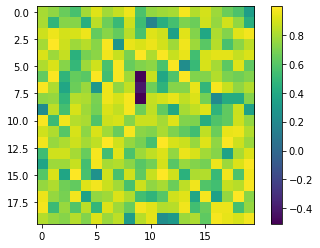

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


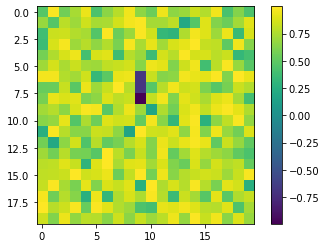

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


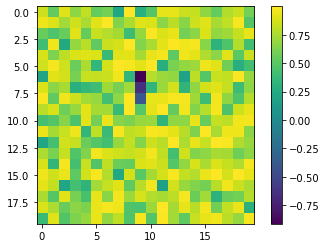

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


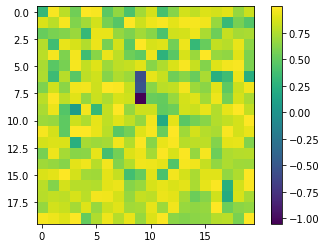

Episode 20000 || Avg Timestep: 201.0 || Lambda: 0.1


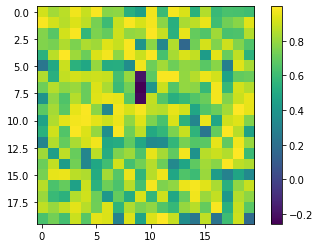

In [4]:
env = gym.make('MountainCar-v0')
env.reset()
lamb = np.linspace(0, 1, 10)
el = []
success_list = []
for i in range(10):
    success, length = q_lambda(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(2e4), lamb = 0.1)
    success_list.append(success)
    el.append(length)

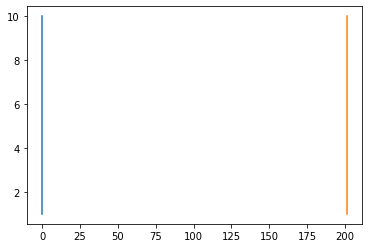

In [6]:
x = range(1,11)
plt.plot(success_list, x, label = "Successes")
plt.plot(el, x, label = "Average Episode Length")
plt.show()